In [462]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [149]:
pd.options.display.max_columns = None

In [6]:
df = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Машинное обучение/Лекция_9_Поиск выбросов и генерация новых признаков/sberbank-russian-housing-market/train.csv')
df.shape

(30471, 292)

In [55]:
data = df[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km', 'price_doc']]
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,3,0.177975,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,...,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,1,0.273345,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,...,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,1,0.158072,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,...,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,6,0.236455,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,...,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,2,0.376838,16331452


Таргет price_doc

In [128]:
data.shape

(30471, 45)

In [57]:
# Посмотрим на данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   life_sq                            24088 non-null  float64
 2   floor                              30304 non-null  float64
 3   max_floor                          20899 non-null  float64
 4   material                           20899 non-null  float64
 5   build_year                         16866 non-null  float64
 6   num_room                           20899 non-null  float64
 7   kitch_sq                           20899 non-null  float64
 8   state                              16912 non-null  float64
 9   area_m                             30471 non-null  float64
 10  raion_popul                        30471 non-null  int64  
 11  green_zone_part                    30471 non-null  flo

In [150]:
data.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,preschool_education_centers_raion,school_education_centers_raion,hospital_beds_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,ID_metro,metro_min_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30446.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,0.218922,0.118871,4.065111,4.705031,1190.738677,1.320895,6.635030,2.896393,4.200978,8.253454,72.484198,42.737601,0.981684,1.323956,3.099942,0.300511,0.768831,0.690947,6.274764,11.318152,14.056721,15.023338,16.044808,4.931418,13.283916,3.958882,1.154586,6.855891,3.926702,1.505808,2.010973,2.896393,1.345235,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,57871.285899,0.175090,0.118688,2.993795,3.445105,1057.015001,1.492903,6.571982,3.290058,4.741812,23.536953,54.902277,69.303131,2.121956,3.058145,3.965363,0.298402,0.717953,0.434919,5.142492,8.066780,8.343162,8.475342,8.441964,4.804238,8.497170,3.447536,1.541425,6.731484,4.907562,2.253759,2.306446,3.290058,3.053600,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.001879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000470,0.000000,0.003737,0.000000,0.000000,0.006707,0.013626,0.001935,0.000355,0.001947,0.072897,0.000000,0.661366,0.003847,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,21819.000000,0.063755,0.019509,2.000000,2.000000,520.000000,0.000000,1.000000,1.000000,1.000000,0.000000,27.000000,11.484150,0.199946,0.269716,0.973297,0.100951,0.288289,0.339637,2.633404,5.339845,8.346336,9.256658,10.460471,2.057437,7.529625,1.543631,0.361170,2.201193,1.016728,0.483758,0.555231,1.000000,0.285124,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,83502.000000,0.167526,0.072158,4.000000,5.000000,990.000000,1.000000,5.000000,2.000000,3.000000,2.000000,53.000000,20.447209,0.353762,0.474862,1.803889,0.214336,0.576464,0.621221,5.467510,9.842632,12.748712,13.611476,14.879161,3.972224,11.910442,2.927417,0.656267,4.337579,2.031685,0.839647,1.052999,2.000000,0.493048,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,122862.000000,0.336177,0.195781,6.000000,7.000000,1786.000000,2.000000,10.000000,4.000000,6.000000,5.000000,108.000000,45.322032,0.971417,0.886531,3.404787,0.415498,1.041085,0.963865,8.184752,15.675454,18.716620,19.945193,20.666814,5.551858,16.560167,5.485423,1.333994,9.380269,5.415663,1.549517,3.046687,4.000000,0.936324,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,247469.000000,0.852923,0.521867,13.000000,14.000000,4849.000000,6.00

Пропуски есть в атрибутах life_sq, floor, max_floor, material, build_year, num_room, kitch_sq, state, hospital_beds_raion, metro_min_walk

In [146]:
# Посмотрим долю/пропушенных значений
data[['life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'hospital_beds_raion', 'metro_min_walk']].isnull().sum(axis=0)

life_sq                 6383
floor                    167
max_floor               9572
material                9572
build_year             13605
num_room                9572
kitch_sq                9572
state                  13559
hospital_beds_raion    14441
metro_min_walk            25
dtype: int64

<AxesSubplot:>

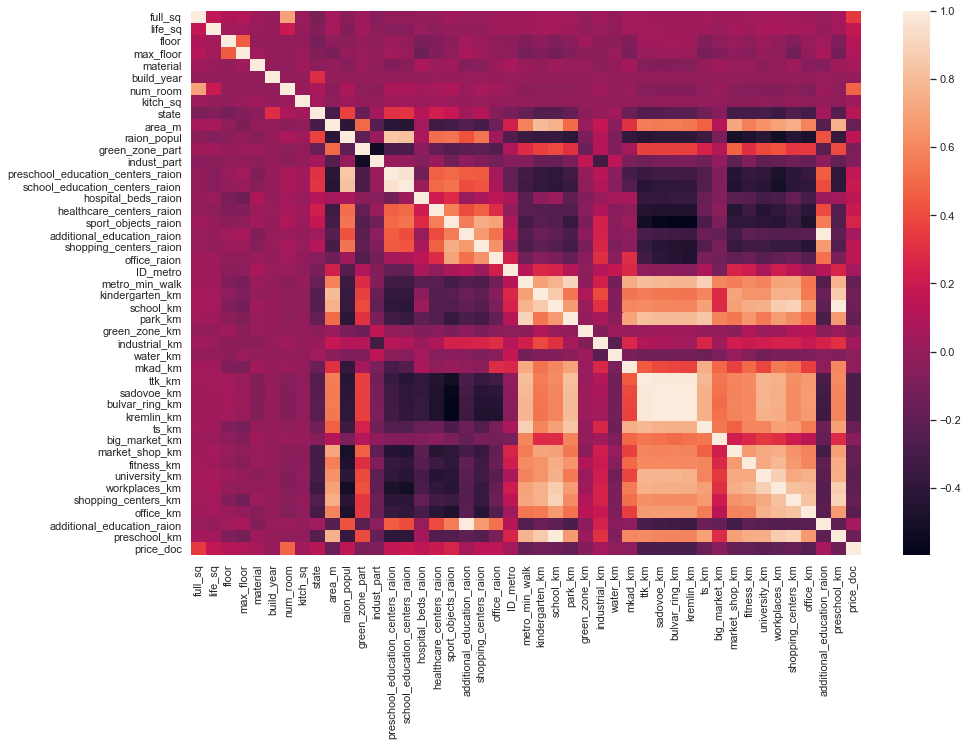

In [167]:
plt.figure(figsize = (15,10))
#sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr())

In [58]:
# Будем использовать линейную регрессию для тестирования качества данных
def get_score(x,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_seed )  
        model.fit(x_train, y_train)
        return model.score(x_test, y_test)

In [327]:
# Создадим словарь для сбора скоров после каждого шага
dict_score = {}

### Вариант 1. Построим модель на сырых данных, удалив строки с пропущенными значениями и обучим модель с использованием StandartScaler

In [328]:
cols = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km']
target = ['price_doc']
dict_score["step_1"] = get_score(scaler.fit_transform(data.dropna()[cols]), data.dropna()[target])
print(dict_score["step_1"])

-57.27953061416481


Результат какой-то странный получился, возможно из-за наличия выбросов

In [331]:
# обнуляем ячейки с отсутствием данных
data_wo_null = data[pd.isnull(data['life_sq']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['floor']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['max_floor']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['material']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['build_year']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['num_room']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['kitch_sq']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['state']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['hospital_beds_raion']) == 0 ]
data_wo_null = data_wo_null[pd.isnull(data_wo_null['metro_min_walk']) == 0 ]

### Вариант 2. Построим боксплот, чтобы посмотреть на выбросы

<AxesSubplot:>

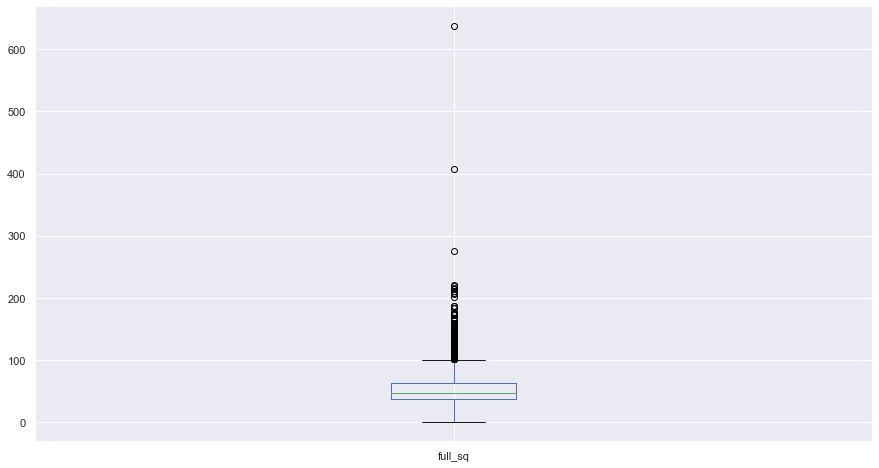

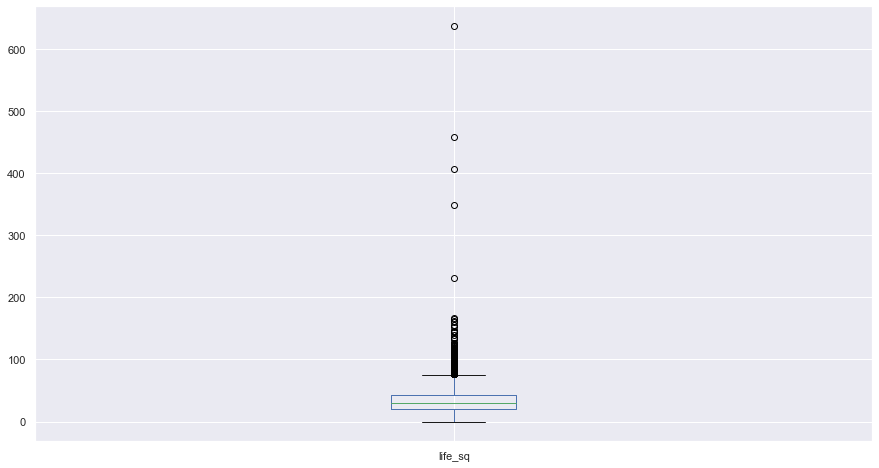

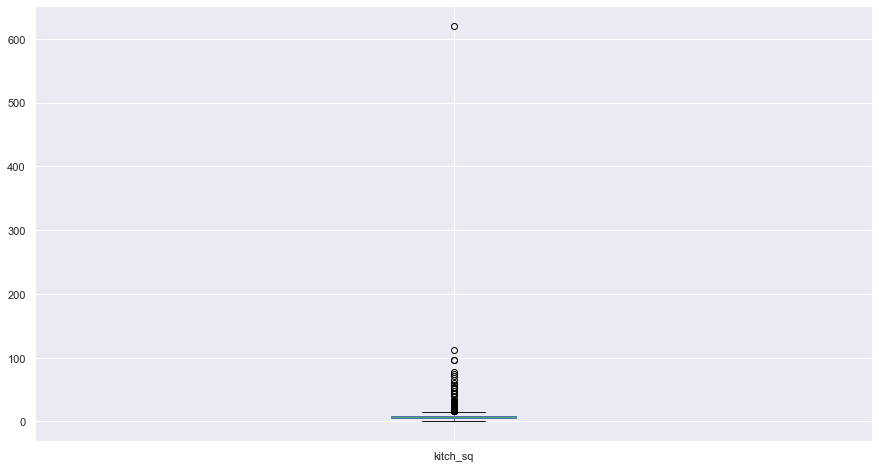

In [332]:
# Построим бок сплот на данных с удаленными пропусками, чтобы проверить наличие выбросов 
data_wo_null[['full_sq']].plot(kind='box', grid=True)
data_wo_null[['life_sq']].plot(kind='box', grid=True)
data_wo_null[['kitch_sq']].plot(kind='box', grid=True)

Удалим выбросы в этих 3-х показателях и обучим модель, убирая пустые значения

In [333]:
# столбец full_sq
data_wo_null.loc[data_wo_null['full_sq'] > 200]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,preschool_education_centers_raion,school_education_centers_raion,hospital_beds_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,ID_metro,metro_min_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
11416,202,115.0,7.0,7.0,6.0,2013.0,5.0,12.0,1.0,8.087656e+06,116742,0.048011,0.007659,5,10,2301.0,3,24,1,19,56,94,6.857765,0.237936,0.715817,0.696693,0.335624,1.342397,0.370466,11.300542,2.418277,0.891475,2.049715,2.975400,4.445586,3.128578,0.998449,0.673982,1.307631,0.715817,0.270751,0.226227,1,0.723609,60000000
15145,215,134.0,10.0,10.0,2.0,2003.0,6.0,7.0,1.0,7.759254e+06,32071,0.278315,0.148904,3,3,1430.0,3,3,0,2,1,12,315.349981,1.584864,1.750848,13.654551,0.104156,0.828336,0.479066,16.552666,29.820986,32.576695,33.298256,34.628200,17.873606,37.955467,2.696320,2.364049,5.173160,1.750848,2.564807,2.510567,0,1.750848,23000000
17710,219,118.0,31.0,48.0,4.0,2010.0,3.0,4.0,1.0,4.800968e+06,26578,0.294718,0.000000,1,1,1786.0,1,20,1,5,39,134,7.468117,0.406481,1.006318,0.395966,0.257613,1.402309,0.451348,12.969160,2.435272,0.378889,1.774377,2.394746,6.382780,6.607727,3.181282,0.295314,1.098037,1.303413,0.323051,0.113446,1,1.006318,14526873
18525,275,232.0,11.0,37.0,6.0,2009.0,5.0,26.0,1.0,7.963519e+06,105663,0.126499,0.161976,4,5,4508.0,3,11,5,7,5,122,14.298080,2.295333,0.139822,1.643601,0.234175,1.470180,0.146075,3.829723,7.066462,9.916780,10.776724,11.946325,3.781039,32.282788,1.640811,0.103632,3.875657,2.349161,0.663088,1.575780,5,0.139822,15919294
19513,206,134.0,6.0,25.0,4.0,2000.0,5.0,57.0,4.0,1.686153e+07,132349,0.069671,0.130618,6,6,900.0,1,12,2,9,9,10,27.286490,0.379233,0.558040,1.109402,0.120817,1.084329,0.991607,3.893050,5.825290,8.846475,9.885340,10.759482,1.845133,19.411574,4.125192,0.000000,6.418439,0.971732,0.227880,0.421501,2,0.558040,55000000
22785,637,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,7.307411e+06,75377,0.065444,0.000078,4,4,1046.0,3,29,16,23,141,120,13.459068,1.048962,0.269716,0.284300,0.189089,2.640803,0.524839,13.917815,4.081283,2.185333,0.506919,0.072897,3.757130,7.836658,1.092897,0.269716,2.180440,1.091507,0.107360,0.182194,16,0.269716,4725142
25183,216,121.0,27.0,30.0,4.0,2003.0,4.0,20.0,4.0,4.800968e+06,26578,0.294718,0.000000,1,1,1786.0,1,20,1,5,39,134,7.468117,0.406481,1.006318,0.395966,0.257613,1.402309,0.451348,12.969160,2.435272,0.378889,1.774377,2.394746,6.382780,6.607727,3.181282,0.295314,1.098037,1.303413,0.323051,0.113446,1,1.006318,64000000
26904,207,93.0,9.0,10.0,2.0,1998.0,4.0,17.0,3.0,4.512002e+06,57999,0.128162,0.015017,3,3,2890.0,0,14,4,8,59,182,1.263474,0.471127,0.364504,0.487153,0.095177,1.127708,0.682906,12.954696,2.074278,0.020966,0.695116,2.218056,1.516185,10.160832,1.914769,0.145135,1.216785,1.190719,0.081140,0.081140,4,0.364504,50000000
27793,407,407.0,4.0,4.0,4.0,2015.0,1.0,10.0,1.0,9.629358e+06,89467,0.343754,0.238617,5,5,705.0,3,18,1,6,6,202,12.686835,0.697651,0.989808,1.664829,0.258018,0.054394,0.426384,8.696976,1.362797,4.587058,5.551335,6.470233,1.425589,17.942376,4.717414,0.714013,1.241019,2.413283,0.157072,0.157072,1,0.989808,3134129
28326,220,144.0,3.0,5.0,2.0,1927.0,9.0,17.0,3.0,1.163805e+07,123280,0.068202,0.042032,7,9,1940.0,2,29,2,5,84,184,13.808553,0.010781,0.345084,0.415343,0.208633,1.813986,0.452245,13.788497,3.131689,0.621388,0.209500,1.387915,4.068716,9.750911,3.010811,0.130117,0.988490,0.793147,0.832810,0.185520,2,0.345084,95122496


In [334]:
# столбец life_sq
data_wo_null.loc[data_wo_null['life_sq'] > 200]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,preschool_education_centers_raion,school_education_centers_raion,hospital_beds_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,ID_metro,metro_min_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
9256,77,458.0,12.0,16.0,1.0,1996.0,3.0,10.0,3.0,2.481385e+07,174831,0.683844,0.037178,7,7,2300.0,1,7,7,7,1,79,20.332892,0.521532,0.114576,0.514515,0.108477,1.068575,0.186645,0.371384,12.803584,15.834400,17.054720,17.774787,1.670753,5.418817,1.169203,0.767063,8.807771,2.303884,1.479057,2.734316,7,0.114576,13750000
18525,275,232.0,11.0,37.0,6.0,2009.0,5.0,26.0,1.0,7.963519e+06,105663,0.126499,0.161976,4,5,4508.0,3,11,5,7,5,122,14.298080,2.295333,0.139822,1.643601,0.234175,1.470180,0.146075,3.829723,7.066462,9.916780,10.776724,11.946325,3.781039,32.282788,1.640811,0.103632,3.875657,2.349161,0.663088,1.575780,5,0.139822,15919294
21080,52,349.0,1.0,9.0,1.0,1979.0,3.0,6.0,2.0,1.132409e+07,113897,0.083810,0.371149,5,5,750.0,2,4,3,5,1,72,18.501813,0.259641,0.514711,1.855040,0.363164,0.020707,0.296505,4.149915,14.310189,17.024377,18.196282,19.048892,1.474245,12.540209,2.746437,1.311307,8.369042,7.723218,1.432467,2.514169,3,0.514711,7200000
22785,637,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,7.307411e+06,75377,0.065444,0.000078,4,4,1046.0,3,29,16,23,141,120,13.459068,1.048962,0.269716,0.284300,0.189089,2.640803,0.524839,13.917815,4.081283,2.185333,0.506919,0.072897,3.757130,7.836658,1.092897,0.269716,2.180440,1.091507,0.107360,0.182194,16,0.269716,4725142
27793,407,407.0,4.0,4.0,4.0,2015.0,1.0,10.0,1.0,9.629358e+06,89467,0.343754,0.238617,5,5,705.0,3,18,1,6,6,202,12.686835,0.697651,0.989808,1.664829,0.258018,0.054394,0.426384,8.696976,1.362797,4.587058,5.551335,6.470233,1.425589,17.942376,4.717414,0.714013,1.241019,2.413283,0.157072,0.157072,1,0.989808,3134129


In [335]:
# столбец life_sq
data_wo_null.loc[data_wo_null['kitch_sq'] > 100]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,preschool_education_centers_raion,school_education_centers_raion,hospital_beds_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,ID_metro,metro_min_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc
11520,38,23.0,11.0,14.0,5.0,1971.0,2.0,620.0,2.0,4395332.782,94561,0.063755,0.038693,4,4,1015.0,2,7,1,5,1,49,14.583077,0.187291,0.528503,0.541023,0.114137,1.073451,0.959898,0.930193,7.615011,10.680913,11.230238,12.798614,0.491474,14.375087,3.361644,0.316634,3.078368,2.093135,0.772458,2.88325,1,0.528503,6300000
27996,112,112.0,3.0,3.0,1.0,2015.0,3.0,112.0,3.0,7632939.805,78810,0.051844,0.437885,3,3,1084.0,0,3,2,5,3,12,25.951902,0.283116,0.431915,0.581199,0.481168,0.385530,1.474372,1.036283,11.028267,13.798983,14.469956,15.869044,1.572189,15.773739,4.034559,0.989110,4.952442,3.232352,0.529696,0.83776,2,0.431915,10500000


In [336]:
# Удалим вышеуказанные выбросы из наших данных и обучим модель
data_abnorm = data_wo_null
data_abnorm = data_abnorm.loc[data_abnorm['full_sq'] <= 200]
data_abnorm = data_abnorm.loc[data_abnorm['life_sq'] <= 200]
data_abnorm = data_abnorm.loc[data_abnorm['kitch_sq'] <= 100]

In [337]:
data_abnorm.shape

(8603, 45)

In [338]:
y = data_abnorm['price_doc']

In [339]:
x = data_abnorm.drop('price_doc',1)
x_scaler = scaler.fit_transform(x)

In [340]:
dict_score["step_2"] = get_score(x_scaler,y)
print(dict_score["step_2"])

0.554057987474265


### Вариант 3. Попробуем удалить выбросы в некоторых данных, заполнить данные в столбцах с пропущенными значениями и после каждого заполнения считать скор

In [346]:
# Создадим копию нашего датафрейма, в котором будем заполнять значения
data_new = data.copy()

In [347]:
# Предварительно удалим выбросы из столбца full_sq, которые больше 99% квантиля
print(data_new['full_sq'].quantile(0.99))
print(data_new['life_sq'].quantile(0.99))
print(data_new['kitch_sq'].quantile(0.99))

134.0
101.0
17.0


In [348]:
# Посмотрим на кол-во строк, которые больше 99% квантиля
print(data_new[data_new['full_sq'] > 134].shape)
print(data_new[data_new['life_sq'] > 101].shape)
print(data_new[data_new['kitch_sq'] > 17].shape)

(292, 45)
(234, 45)
(180, 45)


In [349]:
# Удалим данные из full_sq, life_sq, kitch_sq, которые больше 99: квантиля
data_new = data_new[(data_new['full_sq'] <= 134) | (data['full_sq'].isna())]
data_new = data_new[(data_new['life_sq'] <= 101) | (data['life_sq'].isna())]
data_new = data_new[(data_new['kitch_sq'] <= 17) | (data['kitch_sq'].isna())]

<ipython-input-349-f3f2bedb2fea>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_new = data_new[(data_new['life_sq'] <= 101) | (data['life_sq'].isna())]
<ipython-input-349-f3f2bedb2fea>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_new = data_new[(data_new['kitch_sq'] <= 17) | (data['kitch_sq'].isna())]


In [350]:
# Удалим данные из life_sq, которые больше full_sq, тк это ошибки
data_new = data_new[(data_new['life_sq'] <= data_new['full_sq']) | (data['life_sq'].isna())]

<ipython-input-350-7f71ab908a7a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_new = data_new[(data_new['life_sq'] <= data_new['full_sq']) | (data['life_sq'].isna())]


In [351]:
# Удалим данные из kitch_sq, которые больше full_sq, тк это ошибки
data_new = data_new[(data_new['kitch_sq'] <= data_new['full_sq']) | (data['kitch_sq'].isna())]

<ipython-input-351-cc2a0991ba55>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_new = data_new[(data_new['kitch_sq'] <= data_new['full_sq']) | (data['kitch_sq'].isna())]


In [352]:
# Посчитаем скор нашей модели
dict_score["step_3"] = get_score(scaler.fit_transform(data_new.dropna()[cols]), data_new.dropna()[target])
print(dict_score["step_3"])

0.4981411590002377


#### Приступим к заполнению пропущенных данных

In [353]:
# Функция которая будет заполнять пропушенные значения
def get_value(x, column, mode='mean', value=0, columns_for_reg=None): 
    if mode == 'value':
        x.loc[x[x[column].isna()].index ,column] = value # заполнение значением
    elif mode == 'median':
        x.loc[x[x[column].isna()].index ,column] = x[column].median()    # заполнение медианой
    elif mode == 'mode':
        x.loc[x[x[column].isna()].index, column] = x[column].mode()[0]   # заполнение модой
    elif mode == 'linreg':   # линейная регрессия
        if columns_for_reg is None:
            cols = list(x.select_dtypes([np.number]).columns) 
            cols.remove(column)
        else:
            cols = columns_for_reg
        x_tmp = x.dropna()  
        m = LinearRegression().fit(x_tmp[cols], x_tmp[column])
        x.loc[x[x[column].isna()].index, column] = m.predict(x[x[column].isna()][cols])
    else:
        x.loc[x[x[column].isna()].index, column] = x[column].mean()  # по умолчанию среднее значение

In [354]:
# Заполним данные в столбце metro_min_walk модой
get_value(data_new, 'metro_min_walk', mode = 'mode')

In [355]:
# Считаем скор
dict_score["step_4"] = get_score(scaler.fit_transform(data_new.dropna()[cols]), data_new.dropna()[target])
print(dict_score["step_4"])

0.5150253556854005


In [360]:
# Заполним данные в столбце floor модой
get_value(data_new, 'floor', mode = 'mode')

In [361]:
# Считаем скор
dict_score["step_5"] = get_score(scaler.fit_transform(data_new.dropna()[cols]), data_new.dropna()[target])
print(dict_score["step_5"])

0.5150253556854005


In [363]:
# Заполним life_sq линейной регрессией на основе нескольких столбцов
get_value(data_new, 'life_sq', mode = 'linreg', columns_for_reg=['full_sq','floor'])

In [364]:
# Заполним kitch_sq линейной регрессией на основе нескольких столбцов
get_value(data_new, 'kitch_sq', mode = 'linreg', columns_for_reg = ['full_sq','life_sq', 'floor'])

In [365]:
# Посчитаем скор
dict_score["step_6"] = get_score(data_new.dropna()[cols], data_new.dropna()[target])
print(dict_score["step_6"])

0.5610858976368335


In [366]:
# Заполним num_room линейной регрессией на основе нескольких столбцов
get_value(data_new, 'num_room', mode = 'linreg', columns_for_reg = ['full_sq','life_sq', 'kitch_sq', 'floor'])

In [367]:
# Посчитаем скор
dict_score["step_7"] = get_score(data_new.dropna()[cols], data_new.dropna()[target])
print(dict_score["step_7"])

0.5610858976368335


In [432]:
# Заполним данные в столбце floor модой
get_value(data_new, 'material', mode = 'mode')

In [433]:
# Посчитаем скор
dict_score["step_8"] = get_score(data_new.dropna()[cols], data_new.dropna()[target])
print(dict_score["step_8"])

0.5610858976368335


После заполнения данных посчитаем скор не на всех столбцах, исключим state, build_year, state, hospital_beds_raion, тк большое кол-во пропущенных значений, а также  mkad_km и ttk_km, тк прослеживается корреляция со значениями sadovoe_km  

In [434]:
cols_2 = ['full_sq', 'life_sq', 'floor', 'material', 'num_room', 'kitch_sq',
'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km']

In [435]:
# Посчитаем скор
dict_score["step_9"] = get_score(data_new.dropna()[cols_2], data_new.dropna()[target])
print(dict_score["step_9"])

0.5546764807442948


### Генерация новых признаков

#### Шаг 1. OneHotEcoding для material

In [436]:
data_gener = data_new.copy()

In [437]:
# Удалим столбцы с большим ко-вом пропущенных значений
del data_gener['build_year']
del data_gener['state']
del data_gener['hospital_beds_raion']
del data_gener['max_floor']

In [440]:
data_gener_dum = pd.get_dummies(data_gener, columns = ['material'])

In [444]:
x2 = data_gener_dum.copy()
del x2['price_doc']

In [445]:
# Посчитаем скор
dict_score["step_10"] = get_score(scaler.fit_transform(x2), data_gener_dum[target])
print(dict_score["step_10"])

0.4832961250431733


#### Шаг 2. Введем log raion_popul

In [446]:
data_gener_dum['log_raion_popul'] = np.log(data_gener_dum['raion_popul'])

In [447]:
data_gener_dum.head()

,full_sq,life_sq,floor,num_room,kitch_sq,area_m,raion_popul,green_zone_part,indust_part,preschool_education_centers_raion,school_education_centers_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,ID_metro,metro_min_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_raion,preschool_km,price_doc,material_1.0,material_2.0,material_3.0,material_4.0,material_5.0,material_6.0,log_raion_popul
0,43,27.0,4.0,1.706215,6.262767,6.407578e+06,155572,0.189727,0.000070,5,5,1,7,3,16,1,1,13.575119,0.145700,0.177975,2.158587,0.600973,1.080934,0.992631,1.422391,10.918587,13.100618,13.675657,15.156211,4.308127,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,3,0.177975,5850000,1,0,0,0,0,0,11.954864
1,34,19.0,3.0,1.384475,5.955887,9.589337e+06,115352,0.372602,0.049637,5,8,1,6,1,3,0,2,7.620630,0.147754,0.273345,0.550690,0.065321,0.966479,0.698081,9.503405,3.103996,6.444333,8.132640,8.698054,0.725560,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,1,0.273345,6000000,1,0,0,0,0,0,11.655744
2,43,29.0,2.0,1.779499,5.977125,4.808270e+06,101708,0.112560,0.118537,4,7,1,5,1,0,1,3,17.351515,0.049102,0.158072,0.374848,0.453172,0.939275,0.468265,5.604800,2.927487,6.963403,8.054252,9.067885,3.562188,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,1,0.158072,5700000,1,0,0,0,0,0,11.529861
3,89,50.0,9.0,3.196988,9.368759,1.258354e+07,178473,0.194703,0.069753,9,10,1,17,6,11,4,4,11.565624,0.179441,0.236455,0.078090,0.106125,0.451173,1.200336,2.677824,14.606501,17.457198,18.309433,19.487005,0.583025,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,6,0.236455,13100000,1,0,0,0,0,0,12.092193
4,77,77.0,4.0,3.200317,5.501783,8.398461e+06,108171,0.015234,0.037316,7,9,4,25,2,10,93,5,8.266305,0.247901,0.376838,0.258289,0.236214,0.392871,0.820294,11.616653,1.721834,0.046810,0.787593,2.578671,2.609420,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,2,0.376838,16331452,1,0,0,0,0,0,11.591469


In [454]:
x3 = data_gener_dum.copy()
del x3['price_doc']
del x3['raion_popul']

In [455]:
# Посчитаем скор
dict_score["step_11"] = get_score(scaler.fit_transform(x3), data_gener_dum[target])
print(dict_score["step_11"])

0.4833374229547125


#### Шаг 3. Введем log area_m

In [458]:
data_gener_dum['log_area_m'] = np.log(data_gener_dum['area_m'])
x4 = data_gener_dum.copy()
del x4['price_doc']
del x4['raion_popul']
del x4['area_m']

In [482]:
# Посчитаем скор (попробуем без scaler)
dict_score["step_12"] = get_score(scaler.fit_transform(x4), data_gener_dum[target])
print(dict_score["step_12"])

0.4830890742730236


#### Шаг 4. PolynomialFeatures

In [465]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x4)

In [468]:
# Посчитаем скор (попробуем без scaler)
dict_score["step_13"] = get_score(x_poly, data_gener_dum[target])
print(dict_score["step_13"])

0.5644249964632188


#### Шаг 5. Преобразуем num_room в целое число

In [485]:
x5 = x4.copy()

In [488]:
x5['num_room_round'] = round(x5['num_room'])
del x5['num_room']

In [490]:
dict_score["step_14"] = get_score(scaler.fit_transform(x5), data_gener_dum[target])
print(dict_score["step_14"])

0.4829865514572427


In [491]:
polynomial_features_2= PolynomialFeatures(degree=2)
x_poly_2 = polynomial_features_2.fit_transform(x5)

In [492]:
# Посчитаем скор (попробуем без scaler)
dict_score["step_15"] = get_score(x_poly_2, data_gener_dum[target])
print(dict_score["step_15"])

0.5643278716761648


In [493]:
dict_score

{'step_1': -57.27953061416481,
 'step_2': 0.554057987474265,
 'step_3': 0.4981411590002377,
 'step_4': 0.5150253556854005,
 'step_5': 0.5150253556854005,
 'step_6': 0.5610858976368335,
 'step_7': 0.5610858976368335,
 'step_8': 0.5610858976368335,
 'step_9': 0.5546764807442948,
 'step_10': 0.4832961250431733,
 'step_11': 0.4833374229547125,
 'step_12': 0.4830890742730236,
 'step_13': 0.5644249964632188,
 'step_14': 0.4829865514572427,
 'step_15': 0.5643278716761648}

(0.0, 0.7)

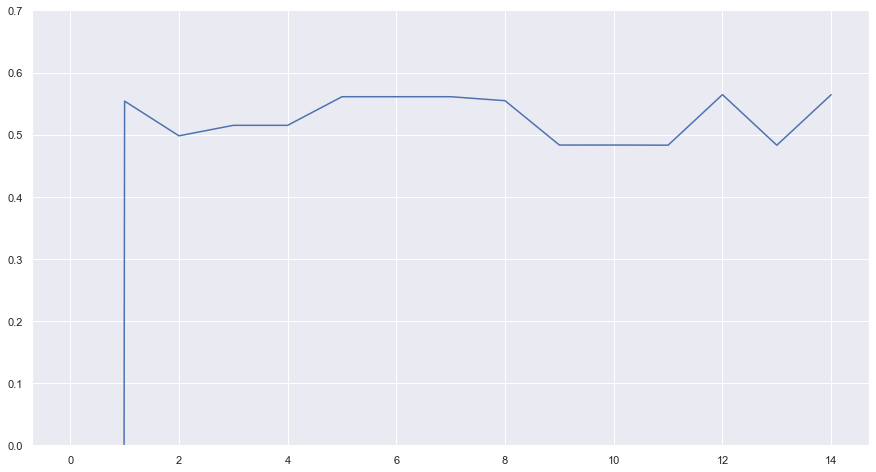

In [494]:
# График качества
plt.plot(dict_score.values())
plt.ylim(0, 0.7)